# Logarithmic scale:

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
x = np.linspace(0,5,100)  

`Axes.set_yscale(value, **kwargs)`

`Axes.set_xscale(value, **kwargs)`

- Parameters: 

value{"linear", "log", "symlog", "logit", ...} or ScaleBase
The axis scale type to apply.


- **kwargs:

Different keyword arguments are accepted, depending on the scale. See the respective class keyword arguments:

matplotlib.scale.LinearScale

matplotlib.scale.LogScale

matplotlib.scale.SymmetricalLogScale

matplotlib.scale.LogitScale

matplotlib.scale.FuncScale

Text(0.5, 1.0, 'Logarithmic scale (y)')

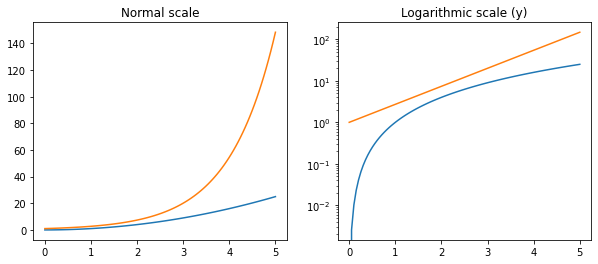

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)")

# Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

- `Axes.set_xticks(ticks, labels=None, *, minor=False, **kwargs)`  (same is for y)

- `Axes.set_xticklabels(labels, *, fontdict=None, minor=False, **kwargs)`   (same is for y)

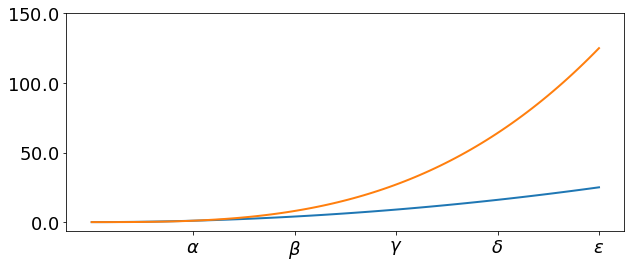

In [3]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

# Scientific notation:
With large number on axes, it is often better to use scientific notation:

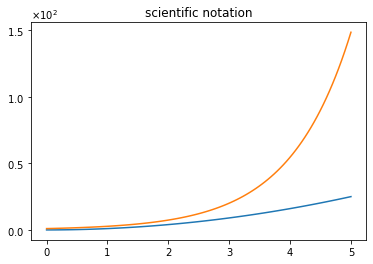

In [4]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker 
formatter = ticker.ScalarFormatter(useMathText=True) 
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

# Axis number & axis label spacing:

matplotlib.rcParams

An instance of RcParams for handling default Matplotlib values.

`class matplotlib.RcParams(*args, **kwargs)`

A dictionary object including validation.

Validating functions are defined and associated with rc parameters in matplotlib.rcsetup.

`[xtick.major.pad]` to add space between the ticklabels and the axes in matplotlib

Text(0, 0.5, 'y')

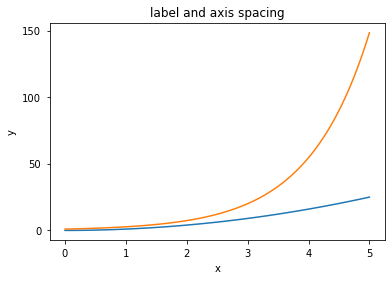

In [5]:
import matplotlib as mpl

# distance between x & y axis & the numbers on the axes
mpl.rcParams['xtick.major.pad'] = 5
mpl.rcParams['ytick.major.pad'] = 5

fig,ax = plt.subplots(1,1)

ax.plot(x, x**2, x, np.exp(x))

ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y")

In [6]:
# restore defaults

mpl.rcParams['xtick.major.pad'] = 3
mpl.rcParams['ytick.major.pad'] = 3


# Axis position adjustments
Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

Text(0, 0.5, 'y')

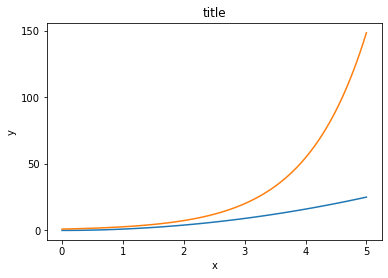

In [7]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

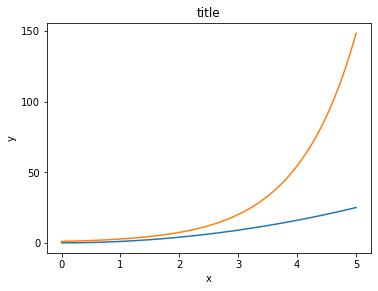

In [8]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=0.9, bottom=0.1, top=0.9)

# Axis grid:
With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

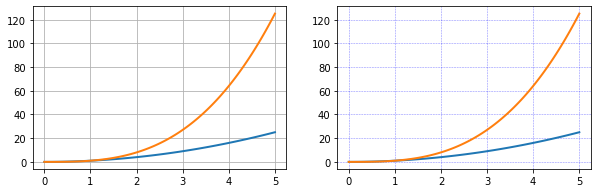

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance 
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', lw=0.5)

# Axis spines:
We can also change the properties of axis spines

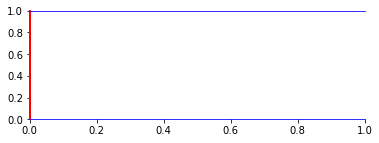

In [10]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color("red")
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left()    # only ticks on the leftt side

# Twin axes:
Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

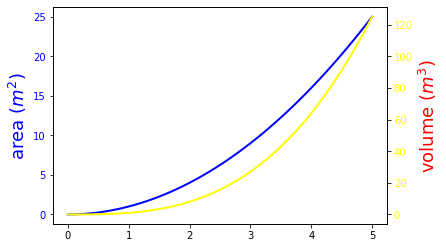

In [11]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="yellow")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
                label.set_color("yellow")

# Axes where x & y is zero:


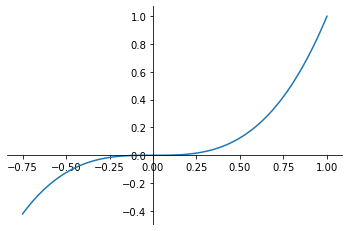

In [12]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))  # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))  # set position of y spine to y=0

xx = np.linspace(-0.75, 1, 100)
ax.plot(xx, xx**3)


# Other 2D plot styles
In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [13]:
n = np.array([0,1,2,3,4,5])

Text(0.5, 1.0, 'fill between')

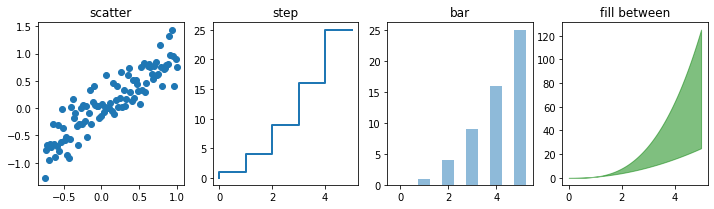

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))


# scatter plot
axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))    # return a sample
                      # (or samples) from the “standard normal” distribution.
axes[0].set_title("scatter")


# step plot
axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")


# bar plot
axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")


# fill between plot
axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)
axes[3].set_title("fill between")

# Text annotation:
Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

Text(0.65, 0.1, '$y=x^3$')

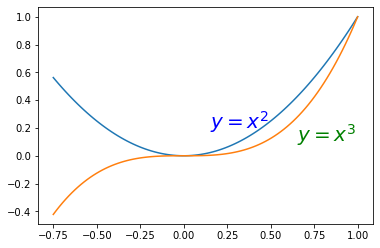

In [15]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green")

# Figures with multiple subplots & insets:
Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

**(I) Subplots:**

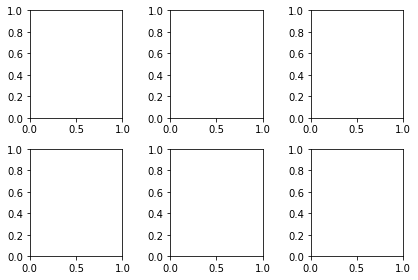

In [16]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

**(II) Subplot2grid:**

Create an axis at specific location inside a regular grid.

Syntax : `Plt.subplot2grid(shape, location, rowspan, colspan)`

Parameters :

- **shape**: As the name suggests it is used to define the shape of the grid to be plotted within the graph. It is a required argument and is generally passed in as a list or tuple of two numbers which are responsible for the layout of the grid with the first number being the number of rows and the second number as the number of columns.

- **location (loc)**: This is the second mandatory argument that this function takes. Similar to the shape argument it is also a required argument and is generally passed in as a list or tuple of two numbers. It is used for specifying the row and column number to place the sub-plot. It is also important to note that the indexes start from 0. So (0, 0) would be the cell in the first row and the first column of the grid.

- **rowspan**: Once the grid layout is set and the starting index is decided using location(loc) one can expand the selection to take up more rows with this argument. This is an optional parameter and has a default value of 1.

- **colspan**: Similar to rowspan it is used to expand the selection to take up more columns. It is also an optional parameter with default value of 1.

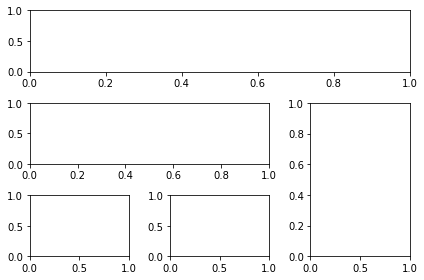

In [17]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

**(III) gridspec:**

`class matplotlib.gridspec.GridSpec(nrows, ncols, figure=None, left=None, bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, height_ratios=None)`

A grid layout to place subplots within a figure.

The location of the grid cells is determined in a similar way to SubplotParams using left, right, top, bottom, wspace and hspace.

In [18]:
import matplotlib.gridspec as gridspec

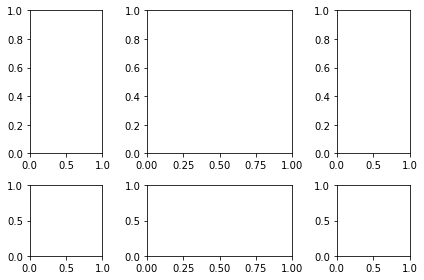

In [19]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

# add_axes:

Manually adding axes with `add_axes` is useful for adding insets to figures:

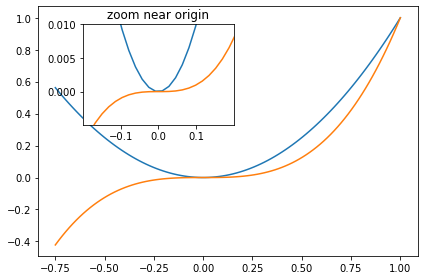

In [20]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset: this is an inset axes over the main axes
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35])    # X, Y, width, height
inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2,.2)
inset_ax.set_ylim(-0.005, 0.01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1, 0, 0.1])


#  Colormap and counter figures:

Colormaps and contour figures are useful for plotting functions of **two variables**. In most of these functions we will use a colormap to encode one dimension of the data. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [21]:
alpha = 0.7 
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

`meshgrid` function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing. Meshgrid function is somewhat inspired from MATLAB

In [22]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

**pcolor:**

`pcolor(C)` creates a pseudocolor plot using the values in matrix C. A pseudocolor plot displays matrix data as an array of colored cells (known as ****faces****). MATLAB® creates this plot as a flat surface in the x-y plane. The surface is defined by a grid of x- and y-coordinates that correspond to the corners (or vertices) of the faces. The grid covers the region X=1:n and Y=1:m, where [m,n] = size(C). Matrix C specifies the colors at the vertices. The color of each face depends on the color at one of its four surrounding vertices. Of the four vertices, the one that comes first in the x-y grid determines the color of the face.

pcolor(X,Y,C) specifies the x- and y-coordinates for the vertices. The size of C must match the size of the x-y coordinate grid. For example, if X and Y define an m-by-n grid, then C must be an m-by-n matrix.

pcolor(ax,___) specifies the target axes for the plot. Specify ax as the first argument in any of the previous syntaxes.

s = pcolor(___) returns a Surface object. Use s to set properties on the plot after creating it. For a list of properties, see Surface Properties.

C:\Users\SHREYA~1\AppData\Local\Temp/ipykernel_5448/2025011743.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=mpl.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())


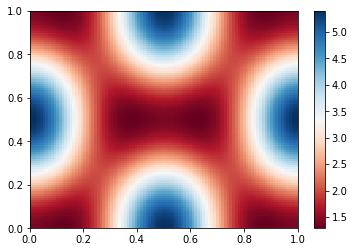

In [24]:


fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=mpl.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

**Imshow**:

`imshow()` function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.

Syntax: `matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=, filternorm=1, filterrad=4.0, imlim=, resample=None, url=None, \*, data=None, \*\*kwargs)`

Parameters: This method accept the following parameters that are described below:

- **X**: This parameter is the data of the image.
- **cmap**: This parameter is a colormap instance or registered colormap name.
- **norm**: This parameter is the Normalize instance scales the data values to the canonical colormap range [0, 1] for mapping to colors
- **vmin, vmax**: These parameter are optional in nature and they are colorbar range.
- **alpha**: This parameter is a intensity of the color.
- **aspect**: This parameter is used to controls the aspect ratio of the axes.
- **interpolation**: This parameter is the interpolation method which used to display an image.
- **origin**: This parameter is used to place the [0, 0] index of the array in the upper left or lower left corner of the axes.
- **resample**: This parameter is the method which is used for resembling.
- **extent**: This parameter is the bounding box in data coordinates.
- **filternorm**: This parameter is used for the antigrain image resize filter.
- **filterrad**: This parameter is the filter radius for filters that have a radius parameter.
- **url**: This parameter sets the url of the created AxesImage.

Returns: This returns the following:

image : This returns the AxesImage

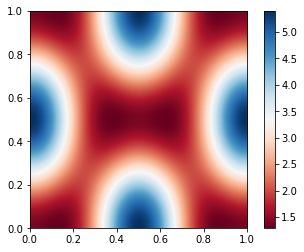

In [26]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=mpl.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

**contour**:

Contour plots also called level plots are a tool for doing multivariate analysis and visualizing 3-D plots in 2-D space. If we consider X and Y as our variables we want to plot then the response Z will be plotted as slices on the X-Y plane due to which contours are sometimes referred as Z-slices or iso-response.

`matplotlib.pyplot` provides a method `contour` to make it easy for us to draw contour plots.

`matplotlib.pyplot.contour`
The matplotlib.pyplot.contour() are usually useful when Z = f(X, Y) i.e Z changes as a function of input X and Y. A `contourf()` is also available which allows us to draw filled contours.

Syntax: `matplotlib.pyplot.contour([X, Y, ] Z, [levels], **kwargs)`

Parameters:
- **X, Y**: 2-D numpy arrays with same shape as Z or 1-D arrays such that len(X)==M and len(Y)==N (where M and N are rows and columns of Z)
- **Z**: The height values over which the contour is drawn. Shape is (M, N)
- **levels**: Determines the number and positions of the contour lines / regions.

Returns: QuadContourSet

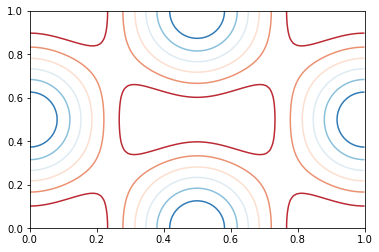

In [29]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=mpl.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

# 3D figures:

To use 3D graphics in matplotlib, we first need to create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.


**Surface plots**

A Surface Plot is a representation of three-dimensional dataset. It describes a functional relationship between two independent variables X and Z and a designated dependent variable Y, rather than showing the individual data points. It is a companion plot of the contour plot. It is similar to the wireframe plot, but each face of the wireframe is a filled polygon. This helps to create the topology of the surface which is being visualized.

Syntax: `ax.plot_surface(X, Y, Z)`
where X and Y are 2D array of points of x and y while Z is 2D array of heights.Some more attributes of ax.plot_surface() function are listed below:
 
| Attribute | Description |
| --- | --- |
| X, Y, Z | 2D arrays of data values |
| cstride | array of column stride(step size) |
| rstride | array of row stride(step size) |
| ccount | number of columns to be used, default is 50 |
| rcount | number of row to be used, default is 50 |
| color | color of the surface |
| cmap | colormap for the surface |
| norm | instance to normalize values of color map |
| vmin | minimum value of map |
| vmax | maximum value of map |
| facecolors | face color of individual surface |
| shade | shades the face color |

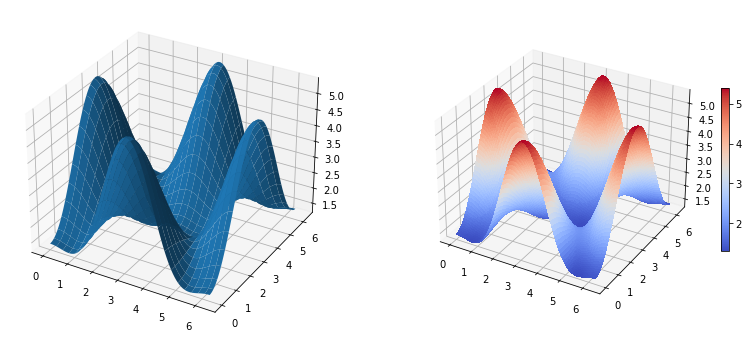

In [31]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=mpl.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

**Wire-frame plot**

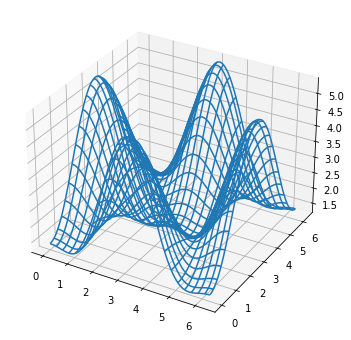

In [35]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

**Counter plots with projections**:

(-3.141592653589793, 6.283185307179586)

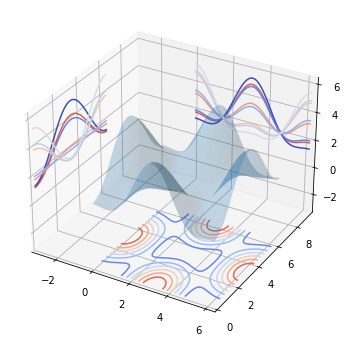

In [38]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=mpl.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=mpl.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=mpl.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi)
ax.set_ylim3d(0, 3*np.pi)
ax.set_zlim3d(-np.pi, 2*np.pi)